<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E8%A9%95%E4%BC%B0%E6%8C%87%E6%A8%99/confusion_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install wget

In [2]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


'ChineseFont.ttf'

### 混淆矩陣 (Confusion Matrix)

真正例 (TP): 4
真負例 (TN): 4
假正例 (FP): 1
假負例 (FN): 1

sklearn 混淆矩陣：
[[4 1]
 [1 4]]


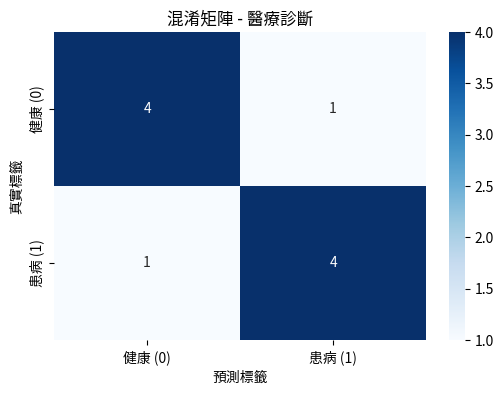

In [4]:
# 導入必要的庫
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

# 假設數據：醫療診斷的情境
# 真實標籤 (1 表示患病患者，0 表示健康患者)
y_true = [1, 0, 1, 0, 1, 0, 0, 1, 0, 1]  # 10 個樣本的真實標籤
# 模型預測標籤
y_pred = [1, 0, 1, 1, 0, 0, 0, 1, 0, 1]  # 模型對這 10 個樣本的預測

# 計算 TP, TN, FP, FN
TP = sum((t == 1 and p == 1) for t, p in zip(y_true, y_pred))  # 真正例：正確預測為患病患者
TN = sum((t == 0 and p == 0) for t, p in zip(y_true, y_pred))  # 真負例：正確預測為健康患者
FP = sum((t == 0 and p == 1) for t, p in zip(y_true, y_pred))  # 假正例：錯誤預測為患病患者的健康患者
FN = sum((t == 1 and p == 0) for t, p in zip(y_true, y_pred))  # 假負例：錯誤預測為健康患者的患病患者

# 輸出各項結果
print(f"真正例 (TP): {TP}")  # 正確識別的患病患者數
print(f"真負例 (TN): {TN}")  # 正確識別的健康患者數
print(f"假正例 (FP): {FP}")  # 錯誤標記為患病患者的健康患者數
print(f"假負例 (FN): {FN}")  # 錯誤標記為健康患者的患病患者數

# 使用 sklearn 的 confusion_matrix 驗證
cm = confusion_matrix(y_true, y_pred)
print("\nsklearn 混淆矩陣：")
print(cm)

# 繪製混淆矩陣圖
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['健康 (0)', '患病 (1)'],
            yticklabels=['健康 (0)', '患病 (1)'])
plt.xlabel('預測標籤')
plt.ylabel('真實標籤')
plt.title('混淆矩陣 - 醫療診斷')
plt.savefig('confusion_matrix.png')
plt.show()

### 程式碼說明
1. **假數據**：模擬醫療診斷情境，10 個樣本的真實標籤 (y_true) 和模型預測標籤 (y_pred)，其中 1 表示患病患者，0 表示健康患者。
2. **計算混淆矩陣元素**：
    - TP（真正例）：正確預測為患病患者的樣本數。
    - TN（真負例）：正確預測為健康患者的樣本數。
    - FP（假正例）：錯誤預測為患病患者的健康患者數。
    - FN（假負例）：錯誤預測為健康患者的患病患者數。
3. **驗證與視覺化**：使用 sklearn.metrics.confusion_matrix 驗證計算結果，並使用 seaborn 繪製混淆矩陣熱圖，保存為 confusion_matrix.png。
4. **輸出結果**：顯示 TP、TN、FP、FN 和混淆矩陣，幫助學生理解這些術語的含義及其在混淆矩陣中的位置。

### 預期輸出
假設運行上述程式碼，輸出可能如下：

```
真正例 (TP): 4
真負例 (TN): 4
假正例 (FP): 1
假負例 (FN): 1

sklearn 混淆矩陣：
[[4 1]
 [1 4]]
```
此外，程式碼會生成一個名為 confusion_matrix.png 的圖檔，顯示混淆矩陣的熱圖，標註各類別的數量。

### 學習建議
- **混淆矩陣的基礎**：可強調 TP、TN、FP、FN 是理解分類模型性能的基石，幫助將這些術語與實際情境（例如醫療診斷）聯繫起來。
- **視覺化**：生成的混淆矩陣熱圖直觀展示了預測結果的分佈，幫助理解各項指標的來源。
- **錯誤類型的意義**：可討論 FP（第一類錯誤，例如誤診健康人）與 FN（第二類錯誤，例如漏診患者）在醫療場景中的不同影響。
- **擴展練習**：可建議修改 y_pred（例如增加 FP 或 FN），觀察混淆矩陣的變化，或計算其他指標（如準確率、精確率、召回率）以加深理解。
- **不均衡數據討論**：可提醒在不均衡數據（例如患病患者遠少於健康人）中，TP 和 FN 的數量可能更關鍵。